In [24]:
import os
import sys

import pandas as pd
import numpy as np
import ast
import json
from df_utils import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pickle

sns.set(font_scale=2, style = 'ticks', palette = 'deep') 

In [25]:
# get data csv
cur_dir =  os.getcwd() 
parent_dir = os.path.dirname(os.path.dirname(cur_dir))
data_file = 'data/online/full_experiment/data_furnituremanufacturing_2021-08-11_09-15.csv'
data_path = os.path.join(parent_dir, data_file)

# transform to dataframe
df, df_model, df_ge, df_vp_sol, df_qual, df_actions, df_built, df_resources, df_play_times = decompose_csv(data_path)

df_complete = get_complete_sol(df_resources)


read cache


# Descriptive statistics


* each subject performance
* performance in each month

## Completeness of solutions
* after the first month more than half of the solutions are complete

In [26]:
print('Percentage of complete solutions in each month: ')
df_interrupted = df_vp_sol.filter(regex='^PL06',axis=1).copy()
df_interrupted['PL06_12'] = 0
df_interrupted.columns =(range(1,13))

df_mask = df_complete.copy()
df_mask = np.where((df_complete == True) & (df_interrupted == 0),
                               'complete',df_mask)

df_mask = np.where((df_complete == False) & (df_interrupted == 0),
                               'incomplete',df_mask)
df_mask = np.where((df_interrupted == 1),
                               'interrupted',df_mask)

df_mask = pd.DataFrame(df_mask)


df_table = pd.DataFrame(np.zeros((3, 12)), columns = range(1,13), 
                        index = ['complete', 'incomplete', 'interrupted'])

perc_comp = []
s = ''
for m in range(1,13):
    c = df_mask[m-1].value_counts().astype(str)
    for k in c.keys():
        s += str(k) + ' ' + str(c[k]) + ', '
        df_table.loc[k,m] = c[k]
    df_table[m] = df_table[m].astype(int)
    perc_comp.append( str(round(((int(c['complete'])/31)*100),1)))

    if 'interrupted' in c.keys():
        print('Month '+ str(m) + ': complete/incomplete/interrupted ' + c['complete'] + '/'+ c['incomplete'] + '/'+ c['interrupted'] 
              + ', Percentage of complete solutions: ' + str(round(((int(c['complete'])/31)*100),1)) + '%' ) 
    else:
        print('Month '+ str(m) + ': complete/incomplete/interrupted ' + c['complete'] + '/'+ c['incomplete'] + '/0' + 
              ', Percentage of complete solutions: ' + str(round(((int(c['complete'])/31)*100),1)) + '%' ) 
df_table.loc['% of complete solutions'] = perc_comp
#print(df_table.to_latex())

Percentage of complete solutions in each month: 
Month 1: complete/incomplete/interrupted 6/12/13, Percentage of complete solutions: 19.4%
Month 2: complete/incomplete/interrupted 17/14/0, Percentage of complete solutions: 54.8%
Month 3: complete/incomplete/interrupted 19/10/2, Percentage of complete solutions: 61.3%
Month 4: complete/incomplete/interrupted 23/7/1, Percentage of complete solutions: 74.2%
Month 5: complete/incomplete/interrupted 20/7/4, Percentage of complete solutions: 64.5%
Month 6: complete/incomplete/interrupted 21/5/5, Percentage of complete solutions: 67.7%
Month 7: complete/incomplete/interrupted 25/6/0, Percentage of complete solutions: 80.6%
Month 8: complete/incomplete/interrupted 22/8/1, Percentage of complete solutions: 71.0%
Month 9: complete/incomplete/interrupted 25/6/0, Percentage of complete solutions: 80.6%
Month 10: complete/incomplete/interrupted 23/8/0, Percentage of complete solutions: 74.2%
Month 11: complete/incomplete/interrupted 26/4/1, Percent

In [27]:
df_interrupted = df_vp_sol.filter(regex='^PL06',axis=1).copy()
df_interrupted['PL06_12'] = 0
df_interrupted.columns =(range(1,13))

df_mask = df_complete.copy()
df_mask = np.where((df_complete == True) & (df_interrupted == 0),
                               'complete',df_mask)

df_mask = np.where((df_complete == False) & (df_interrupted == 0),
                               'incomplete',df_mask)
df_mask = np.where((df_complete == True) & (df_interrupted == 1),
                               'complete and interrupted',df_mask)
df_mask = np.where((df_complete == False) & (df_interrupted == 1),
                               'incomplete and interrupted',df_mask)
df_mask = pd.DataFrame(df_mask)

df_table = pd.DataFrame(np.zeros((4, 12)), columns = range(1,13), 
                        index = ['complete', 'incomplete', 'incomplete and interrupted', 'complete and interrupted'])

perc_comp = []
for m in range(1,13):
    s = 'Month '+ str(m) + ': '
    c = df_mask[m-1].value_counts()
    for k in c.keys():
        s += str(k) + ' ' + str(c[k]) + ', '
        df_table.loc[k,m] = c[k]
    df_table[m] = df_table[m].astype(int)
    print(s)
    perc_comp.append( str(round(((int(c['complete'])/31)*100),1)))
df_table.loc['% of complete solutions'] = perc_comp
#print(df_table.to_latex())

Month 1: incomplete 12, incomplete and interrupted 12, complete 6, complete and interrupted 1, 
Month 2: complete 17, incomplete 14, 
Month 3: complete 19, incomplete 10, incomplete and interrupted 2, 
Month 4: complete 23, incomplete 7, complete and interrupted 1, 
Month 5: complete 20, incomplete 7, incomplete and interrupted 3, complete and interrupted 1, 
Month 6: complete 21, incomplete 5, incomplete and interrupted 3, complete and interrupted 2, 
Month 7: complete 25, incomplete 6, 
Month 8: complete 22, incomplete 8, incomplete and interrupted 1, 
Month 9: complete 25, incomplete 6, 
Month 10: complete 23, incomplete 8, 
Month 11: complete 26, incomplete 4, incomplete and interrupted 1, 
Month 12: complete 24, incomplete 7, 


In [28]:
print(df_table.to_latex())

\begin{tabular}{lllllllllllll}
\toprule
{} &    1  &    2  &    3  &    4  &    5  &    6  &    7  &    8  &    9  &    10 &    11 &    12 \\
\midrule
complete                   &     6 &    17 &    19 &    23 &    20 &    21 &    25 &    22 &    25 &    23 &    26 &    24 \\
incomplete                 &    12 &    14 &    10 &     7 &     7 &     5 &     6 &     8 &     6 &     8 &     4 &     7 \\
incomplete and interrupted &    12 &     0 &     2 &     0 &     3 &     3 &     0 &     1 &     0 &     0 &     1 &     0 \\
complete and interrupted   &     1 &     0 &     0 &     1 &     1 &     2 &     0 &     0 &     0 &     0 &     0 &     0 \\
\% of complete solutions    &  19.4 &  54.8 &  61.3 &  74.2 &  64.5 &  67.7 &  80.6 &  71.0 &  80.6 &  74.2 &  83.9 &  77.4 \\
\bottomrule
\end{tabular}



## Aggregate statistics

Without the first month which is regarded as a trial month

In [29]:

df_diff = get_df_diff(df_vp_sol, df_model)

print("Mean and std without the training trial")
print(round(np.mean(df_diff[df_diff.columns[1:]].mean(axis = 1)),2))
print(round(np.std(df_diff[df_diff.columns[1:]].mean(axis = 1)),2))

print("Mean and std with the training trial")
print(round(np.mean(df_diff.mean(axis = 1)),2))
print(round(np.std(df_diff.mean(axis = 1)),2))

Mean and std without the training trial
-10.78
6.54
Mean and std with the training trial
-12.03
6.76


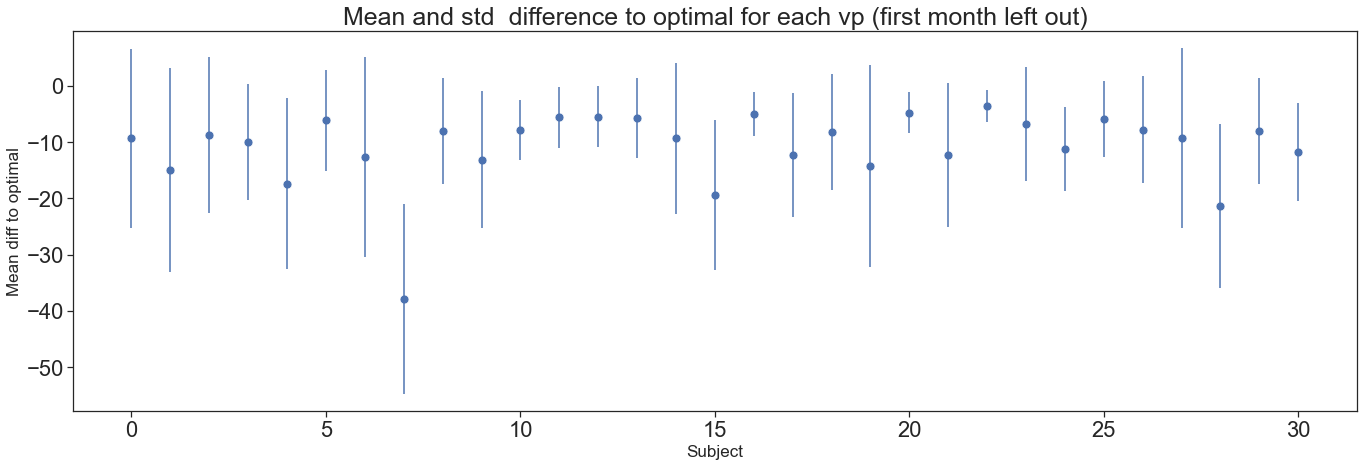

In [30]:
fig = plt.figure(figsize=(23, 7) )
plt.title('Mean and std  difference to optimal for each vp (first month left out)', fontsize = 25)
sns.scatterplot(data = df_diff[df_diff.columns[1:]],y =df_diff[df_diff.columns[1:]].mean(axis = 1),x = range(31), s=80 )
plt.errorbar( x= range(31), y=df_diff[df_diff.columns[1:]].mean(axis = 1), yerr=df_diff[df_diff.columns[1:]].std(axis = 1),ls='none' )

xlabel = plt.xlabel('Subject', fontsize = 17)
ylabel = plt.ylabel('Mean diff to optimal', fontsize = 17)

# Statistics over months

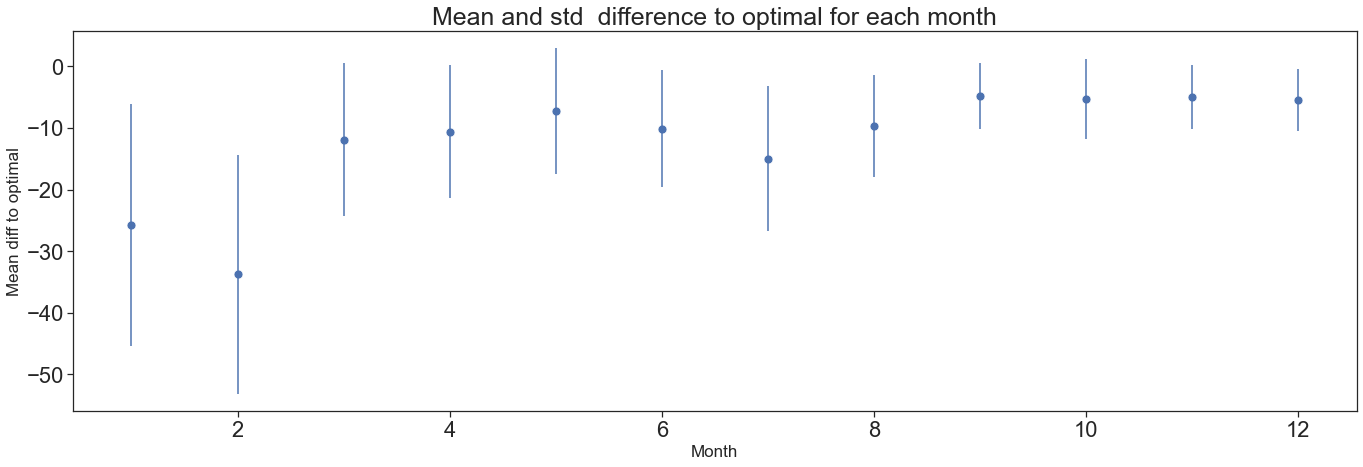

In [31]:
fig = plt.figure(figsize=(23, 7) )
plt.title('Mean and std  difference to optimal for each month', fontsize = 25)
sns.scatterplot(y =df_diff.mean(axis = 0),x = df_diff.columns, s=80 )
plt.errorbar( x= range(1,13), y=df_diff.mean(axis = 0), yerr=df_diff.std(axis = 0),ls='none' )

xlabel = plt.xlabel('Month', fontsize = 17)
ylabel = plt.ylabel('Mean diff to optimal', fontsize = 17)

In [32]:
df_diff.mean(axis = 0)

month
1    -25.806452
2    -33.776091
3    -11.880409
4    -10.591398
5     -7.221955
6    -10.080645
7    -14.956012
8     -9.611587
9     -4.812269
10    -5.256870
11    -4.942768
12    -5.414747
dtype: float64

In [33]:
df_diff.std(axis = 0)

month
1     19.632319
2     19.441844
3     12.384576
4     10.814500
5     10.211230
6      9.426506
7     11.806145
8      8.267927
9      5.302554
10     6.452258
11     5.183679
12     5.060935
dtype: float64

# Confidence Rating analysis




## 1. Self-confidence ratings

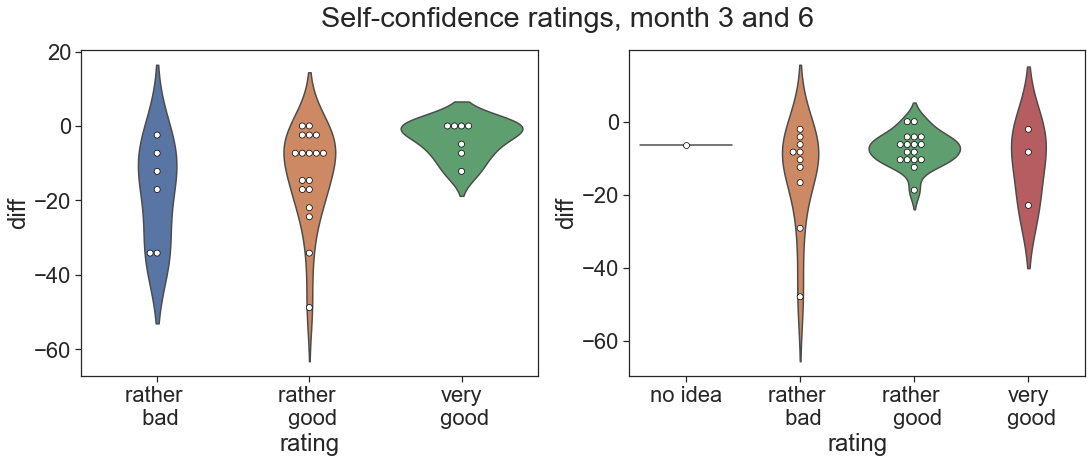

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,6))
fig.suptitle('Self-confidence ratings, month 3 and 6')



df_diff = get_df_diff(df_vp_sol, df_model)

dfeval3=  pd.concat([df_qual['AS01_01'],df_diff[3]], axis = 1)
dfeval3.columns = ['rating', 'diff']
sns.violinplot(data=dfeval3, x='rating', y = 'diff', ax = ax1, s=8, inner = None)
g =sns.swarmplot(data=dfeval3, x='rating', y = 'diff', ax = ax1, s=6, color="white", edgecolor="black", linewidth = 0.7)
labels = ['no idea', 'very \n bad', 'rather \n bad', 'rather \n good', 'very\n good']
_=g.set_xticklabels(labels[2:])
dfeval6=  pd.concat([df_qual['AS02_01'],df_diff[6]], axis = 1)
dfeval6.columns = ['rating', 'diff']
sns.violinplot(data=dfeval6, x='rating', y = 'diff', ax = ax2, s=8, inner = None)
h = sns.swarmplot(data=dfeval6, x='rating', y = 'diff', ax = ax2, s=6, color="white", edgecolor="black", linewidth = 0.7)
_ =h.set_xticklabels([labels[0], labels[2], labels[3], labels[4]])
fig.savefig('Images/self_confidence_rating.png')


In [35]:
# correlation between score and rating, missing values?
from scipy import stats

print(stats.spearmanr(dfeval3['diff'], dfeval3['rating']))
print(stats.spearmanr(dfeval6['diff'], dfeval6['rating']))


SpearmanrResult(correlation=0.46186328536697224, pvalue=0.00890653125342714)
SpearmanrResult(correlation=0.14452231491153594, pvalue=0.43793524624605307)


## 1. Confidence in other solution (Mike)

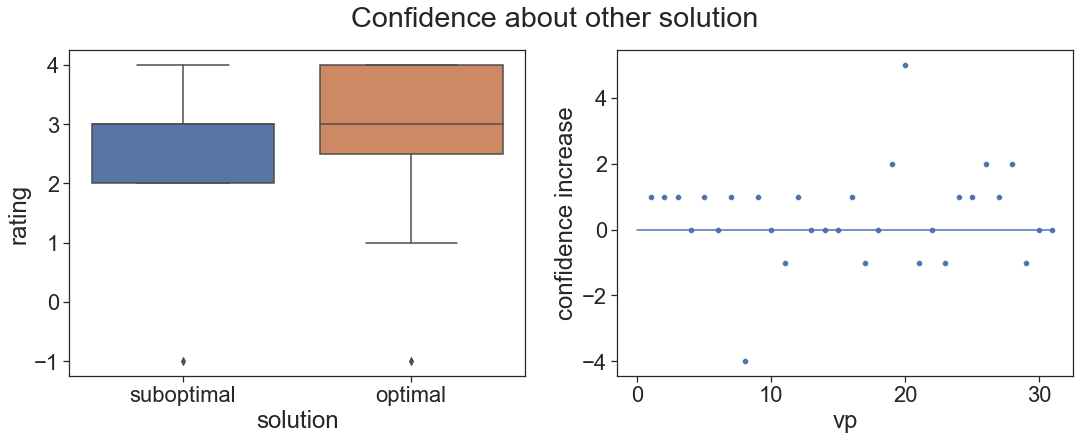

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,6))
fig.suptitle('Confidence about other solution')


df_qual['vp'] = range(1,32)
dfeval=  pd.concat([df_qual['FB01_01'],df_qual['FB02_01'], df_qual['vp']], axis = 1)
dfeval.columns = ['suboptimal', 'optimal', 'vp']
dfcol =dfeval.melt(id_vars = 'vp',value_vars = ['suboptimal', 'optimal'], var_name='solution', value_name='rating')
#sns.swarmplot(data=dfeval, x='solution', y = 'rating', ax = ax1)

sns.boxplot(data=dfcol, x='solution', y = 'rating', ax = ax1   )

dfeval['confidence increase'] = dfeval.optimal-dfeval.suboptimal

sns.scatterplot(data=dfeval, x='vp', y='confidence increase', ax = ax2)
sns.lineplot( x=range(32), y=np.zeros(32), ax = ax2)
fig.savefig('Images/mike_confidence_rating.png')


In [37]:
# statistics?

In [38]:
dfeval['suboptimal'].median()

3.0

In [39]:
dfeval['optimal'].median()

3.0